In [ ]:
###importo le librerie che utilizzerò

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


In [ ]:
##trovo il percorso del file

In [2]:
bbg = 'data/bgg.csv'

In [ ]:
#utilizzando pandas e il suo metodo di lettura csv lo inserisco in un DataFrame

In [3]:
df = pd.read_csv(bbg)

In [10]:
df.dtypes

game        int64
title      object
rating    float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082167 entries, 0 to 1082166
Data columns (total 3 columns):
game      1082167 non-null int64
title     1082167 non-null object
rating    706813 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.8+ MB


In [12]:
df.head()

,game,title,rating
0,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
1,25984,Trivial Pursuit: Genus IV – Canadian Edition,5.0
2,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
3,25984,Trivial Pursuit: Genus IV – Canadian Edition,7.0
4,25984,Trivial Pursuit: Genus IV – Canadian Edition,6.0


In [23]:
df['rating'].describe().apply("{0:.5f}".format)

count    706813.00000
mean          6.42343
std           1.90770
min           0.00000
25%           5.00000
50%           6.95000
75%           8.00000
max          10.00000
Name: rating, dtype: object

In [15]:
df['rating'].nunique()

1650

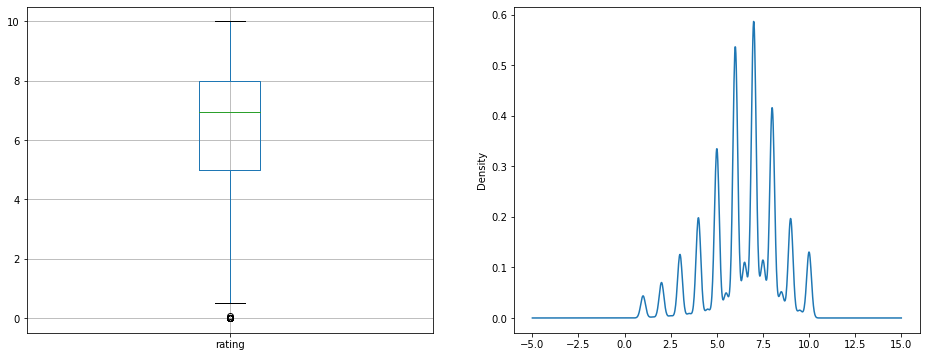

In [24]:
fig, ax = plt.subplots(figsize=(16, 6),nrows=1, ncols=2)
df[['rating']].boxplot(ax=ax[0])
df['rating'].plot.kde(ax=ax[1])
plt.show()
    


In [ ]:
## Nuovo DataFrame con la media aritmetica dei voti per ciascun gioco messi in ordine 

In [7]:
df_mean_ranking = df.groupby(['game', 'title']).agg(mean_rating=('rating', 'mean')).sort_values('mean_rating', ascending= False)[:20]

In [8]:
df_mean_ranking

,,mean_rating
game,title,
13738,Aftermath,10.000000
8083,Cowgirls,10.000000
29345,David Dickinson's Antique Chase,10.000000
12216,Rumble,10.000000
27836,Baseball Mania,10.000000
1486,Plunder,10.000000
24824,Retinue: Medieval Skirmish Rules,10.000000
9276,Medieval Warfare,10.000000
10992,Zamitar,10.000000


In [ ]:
## Dataframe con il commentati per gioco

In [9]:
df_comment_ranking = df.groupby(['game', 'title']).agg(comment_count=('game', 'count')).sort_values('comment_count', ascending= False)

In [10]:
df_comment_ranking

,,comment_count
game,title,
1,Die Macher,100
41916,The Magic Labyrinth,100
41658,Adios Amigos,100
41749,American Rails,100
41762,Fastrack,100
...,...,...
26433,Colo Rolo,5
5337,Route 66,5
10181,The Hunchback of Notre Dame,5


In [ ]:
## Dataframe con entrambi i commenti e rating

In [11]:
df_global = df.groupby(['game', 'title']).agg(mean_rating=('rating', 'mean'), comment_count=('game', 'count')).sort_values('mean_rating', ascending= False)



In [12]:
df_global

,,mean_rating,comment_count
game,title,,
13738,Aftermath,10.0,5
8083,Cowgirls,10.0,5
29345,David Dickinson's Antique Chase,10.0,5
12216,Rumble,10.0,5
27836,Baseball Mania,10.0,6
...,...,...,...
30400,Scramble for Africa,NaN,5
30573,Caddyshack Trivia Game,NaN,7
30639,Scrapyard Wars,NaN,6


In [ ]:
## grafico per vedere i commenti

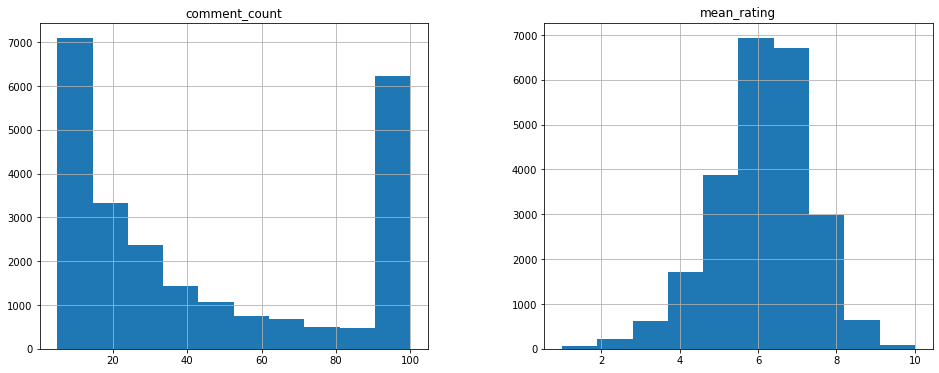

In [13]:
fig, ax = plt.subplots(figsize=(16, 6),nrows=1, ncols=2)
df_global[['comment_count']].hist(ax=ax[0])
df_global[['mean_rating']].hist(ax=ax[1])
plt.show()
    